# **Installations & Imports**

In [1]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from prophet import Prophet

# **EDA**

In [3]:
train = pd.read_csv("/content/train.csv")
train.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [4]:
test = pd.read_csv("/content/test.csv")
test.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [5]:
train.dtypes

row_id        int64
datetime     object
energy      float64
dtype: object

In [6]:
train["datetime"] = pd.to_datetime(train['datetime'])

In [7]:
train.dtypes

row_id               int64
datetime    datetime64[ns]
energy             float64
dtype: object

Mean is:- 1377.9164091460877. Variance is :- 47273.29586921629


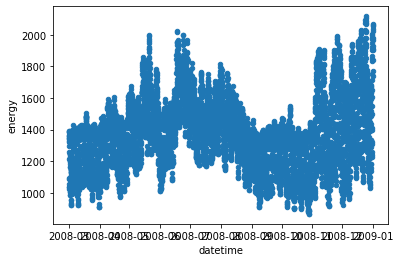

In [8]:
train_2008 = train[train["datetime"].dt.year==2008]
print("Mean is:- "+str(np.mean(train_2008["energy"]))+". Variance is :- "+str(np.var(train_2008["energy"])))
train_2008.plot(kind = "scatter" , x = "datetime", y="energy")
plt.show()


Mean is:- 1462.2363756787684. Variance is :- 54600.6895507646


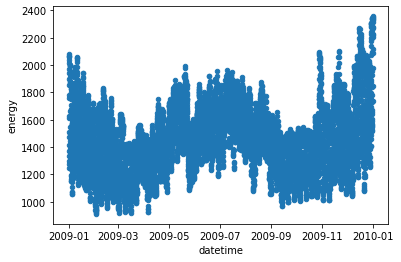

In [9]:
train_2009 = train[train["datetime"].dt.year==2009]
print("Mean is:- "+str(np.mean(train_2009["energy"]))+". Variance is :- "+str(np.var(train_2009["energy"])))
train_2009.plot(kind = "scatter" , x = "datetime", y="energy")
plt.show()

Mean is:- 1439.5907302638484. Variance is :- 50423.31844597468


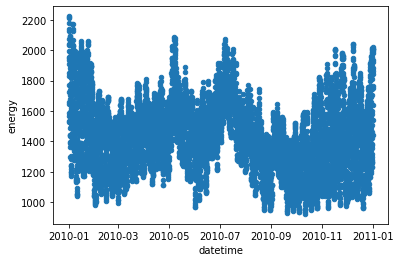

In [10]:
train_2010 = train[train["datetime"].dt.year==2010]
print("Mean is:- "+str(np.mean(train_2010["energy"]))+". Variance is :- "+str(np.var(train_2010["energy"])))
train_2010.plot(kind = "scatter" , x = "datetime", y="energy")
plt.show()

Mean is:- 1493.0311514350612. Variance is :- 58790.11040653394


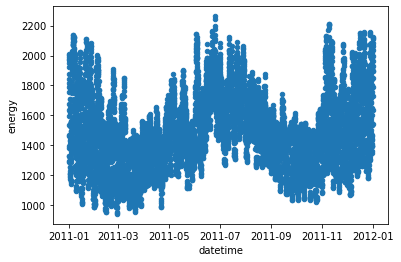

In [11]:
train_2011 = train[train["datetime"].dt.year==2011]
print("Mean is:- "+str(np.mean(train_2011["energy"]))+". Variance is :- "+str(np.var(train_2011["energy"])))
train_2011.plot(kind = "scatter" , x = "datetime", y="energy")
plt.show()

Mean is:- 1575.5776678504944. Variance is :- 73311.53805571457


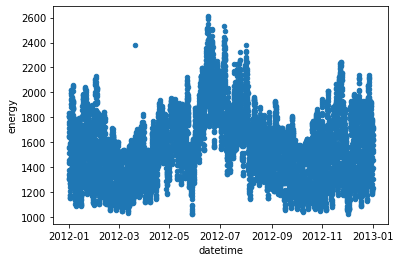

In [12]:
train_2012 = train[train["datetime"].dt.year==2012]
print("Mean is:- "+str(np.mean(train_2012["energy"]))+". Variance is :- "+str(np.var(train_2012["energy"])))
train_2012.plot(kind = "scatter" , x = "datetime", y="energy")
plt.show()

Mean is:- 1638.486142024156. Variance is :- 72703.2656522856


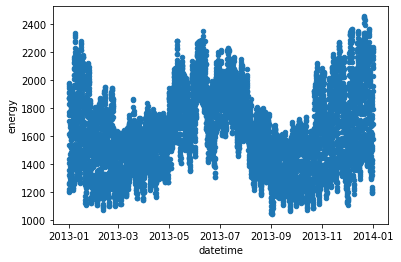

In [13]:
train_2013 = train[train["datetime"].dt.year==2013]
print("Mean is:- "+str(np.mean(train_2013["energy"]))+". Variance is :- "+str(np.var(train_2013["energy"])))
train_2013.plot(kind = "scatter" , x = "datetime", y="energy")
plt.show()

# **TSA Using Prophet**

In [14]:
train = pd.read_csv("/content/train.csv")
train["datetime"] = pd.to_datetime(train['datetime'])
train.drop(["row_id"],axis = 1,inplace=True)

In [15]:
train.head()

,datetime,energy
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500


In [16]:
train.columns = ['ds', 'y']
pf_model = Prophet(changepoint_range = 0.5,changepoint_prior_scale=0.15,seasonality_prior_scale = 8,seasonality_mode="multiplicative")
pf_model.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp8xampxxz/hi8a5f2j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8xampxxz/pjvzajfi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12897', 'data', 'file=/tmp/tmp8xampxxz/hi8a5f2j.json', 'init=/tmp/tmp8xampxxz/pjvzajfi.json', 'output', 'file=/tmp/tmp8xampxxz/prophet_modeld9es8f8v/prophet_model-20221120125132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:51:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:53:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
test = pd.read_csv("/content/test.csv")
test["datetime"] = pd.to_datetime(test['datetime'])
test.drop(["row_id"],axis = 1,inplace=True)
test.columns = ['ds']
pf_model_pred = pf_model.predict(test)

In [18]:
pf_model_pred["yhat"]

0        2025.568896
1        1933.910904
2        1866.979132
3        1832.871562
4        1837.890796
            ...     
26299    2665.495654
26300    2682.223829
26301    2660.989430
26302    2590.463950
26303    2481.214945
Name: yhat, Length: 26304, dtype: float64

In [19]:
test_submit3 = pd.read_csv("/content/test.csv")
test_submit3["energy"] = pf_model_pred["yhat"]
test_submit3.drop(["datetime"],axis=1,inplace=True)

In [20]:
test_submit3.to_csv("test_submit10.csv",index=False)

Mean is:- 2107.6645144098734. Variance is :- 78166.94651798952


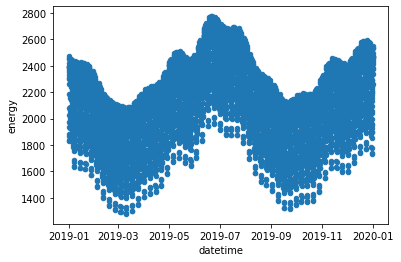

In [21]:
test1 = pd.read_csv("/content/test.csv")
test1["energy"] = pf_model_pred["yhat"]
test1["datetime"] = pd.to_datetime(test1['datetime'])
test1["year"] = test1["datetime"].dt.year
test1["month"] = test1["datetime"].dt.month
test1["day"] = test1["datetime"].dt.day
test1["hours"] = test1["datetime"].dt.hour
test1_2019 = test1[test1["datetime"].dt.year==2019]
print("Mean is:- "+str(np.mean(test1_2019["energy"]))+". Variance is :- "+str(np.var(test1_2019["energy"])))
test1_2019.plot(kind = "scatter" , x = "datetime", y="energy")
plt.show()